In [49]:
import pandas
from matplotlib import cycler  # type: ignore
from matplotlib import rcParams
from pandas import DataFrame

from src.diagnostic.plot import plotHeatMap
from src.parsers.bionano_file_reader import BionanoFileReader

rcParams["lines.linewidth"] = 1
rcParams['axes.prop_cycle'] = cycler(color=["#e74c3c"])

queryName = "chr1_simulated_1T_200T_scale001_meas100_res600_changed_8"
peaksFile = f"../.local_data/simulated/output/{queryName}_peaks.csv"
simulationMetadataFilePath = "../.local_data/simulated/filtered_molecules.sdata"

simulationMetadata: DataFrame
with open(simulationMetadataFilePath, "r") as simulationMetadataFile:
    simulationMetadata = BionanoFileReader(headersLinePrefix="#Fragment").readFile(
        simulationMetadataFile, ["ID", "Strand", "Start", "Stop"])

peaks = pandas.read_csv(peaksFile)

In [50]:
peaksWithSimulationMetadata = peaks.merge(simulationMetadata, left_on="queryId", right_on="ID")
peaksWithSimulationMetadata["valid"] = peaksWithSimulationMetadata.apply(
    lambda row: ((row["Strand"] == "-") == row["reverseStrand"])
                and int(row["Start"]) <= int(row["peakPosition"]) <= int(row["Stop"]), axis=1)

In [68]:
validByResolutionAndBlur = peaksWithSimulationMetadata[["resolution", "blur", "valid"]].groupby(
    ["resolution", "blur"]).mean().unstack()
validByResolutionAndBlur.columns

MultiIndex([('valid', 1),
            ('valid', 2),
            ('valid', 3)],
           names=[None, 'blur'])

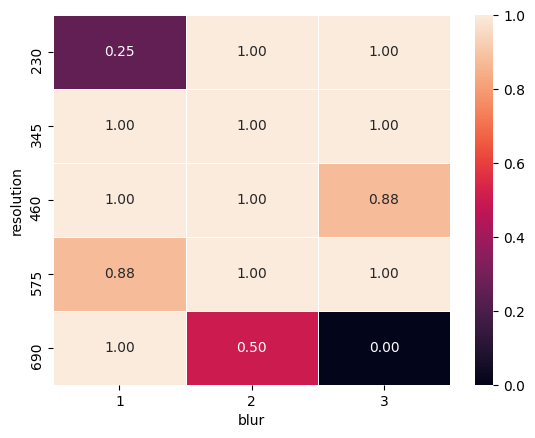

In [74]:
x = validByResolutionAndBlur.columns.get_level_values("blur").unique()
y = validByResolutionAndBlur.index.unique()
plotHeatMap(validByResolutionAndBlur["valid"], f"../.local_data/simulated/output/{queryName}_heatmap.svg", x, y)